<h1><center>Heesch Group Tesselations</center></h1>

<center><a href = "mailto: joseph.d.romano@gmail.com">joseph.d.romano@gmail.com</a></center>

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as lines
import matplotlib as mpl
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

#mpl.rcParams['figure.dpi'] = 200
#mpl.rcParams['figure.figsize'] = [5,3]
mpl.rcParams['text.usetex'] = True

# Various functions

In [3]:
def makeEdge(type):
    '''
    generate standard edges (horizontal orientation, length=1, leftmost vertex at (0,0))
    
    type: Ea, Eb, Ec, Ca, Cb, Cc
    
    returns P, V, C (points defining the edge, two vertices, and a rotational center, if appropriate)
    '''
    
    if type=='Ea':
        
        P = np.zeros((4,2))
        P[0,:] = np.array([0, 0])
        P[1,:] = np.array([2./3., 1./12.])
        P[2,:] = np.array([2./3., 0])
        P[3,:] = np.array([1., 0])
        #C = []
        C = np.array([])
            
    if type=='Eb':
        
        P = np.zeros((4,2))
        P[0,:] = np.array([0, 0])
        P[1,:] = np.array([0.5, 1./12.])
        P[2,:] = np.array([5./6., -1./12.])
        P[3,:] = np.array([1., 0])
        #C = []
        C = np.array([])
        
    if type=='Ec':
        
        P = np.zeros((4,2))
        P[0,:] = np.array([0, 0])
        P[1,:] = np.array([0.25, -1./12.])
        P[2,:] = np.array([0.5, 0])
        P[3,:] = np.array([1., 0])
        C = np.array([])
        
    if type=='Ca':
        
        P = np.zeros((4,2))
        P[0,:] = np.array([0, 0])
        P[1,:] = np.array([1./3., -1./12.])
        P[2,:] = np.array([2./3., 1./12.])
        P[3,:] = np.array([1., 0])
        C = np.zeros((1,2))
        C[0,:] = np.array([0.5,0]) 
        
    if type=='Cb':
        
        P = np.zeros((6,2))
        P[0,:] = np.array([0, 0])
        P[1,:] = np.array([1./3, 0])
        P[2,:] = np.array([1./3., -1./12.])
        P[3,:] = np.array([2./3., 1./12.])
        P[4,:] = np.array([2./3., 0])
        P[5,:] = np.array([1., 0])
        C = np.zeros((1,2))
        C[0,:] = np.array([0.5,0]) 
        
    if type=='Cc':
        
        P = np.zeros((8,2))
        P[0,:] = np.array([0, 0])
        P[1,:] = np.array([1./3., 0])
        P[2,:] = np.array([1./3., -1./12.])
        P[3,:] = np.array([0.5, -1./12.])
        P[4,:] = np.array([0.5, 1./12.])
        P[5,:] = np.array([2./3., 1./12.])
        P[6,:] = np.array([2./3., 0])
        P[7,:] = np.array([1., 0])
        C = np.zeros((1,2))
        C[0,:] = np.array([0.5,0])     
        
    # vertices (same for all edges)
    V = np.zeros((2,2))
    V[0,:] = np.array([0, 0])
    V[1,:] = np.array([1., 0])
    
    return P, V, C

In [4]:
def plotPoints(P):
    '''
    plot points of an edge or tile (piecewise linear edges)
    '''
    
    N = P.shape[0]
    
    for ii in range(0,N-1):
        x = np.array([P[ii,0], P[ii+1,0]])
        y = np.array([P[ii,1], P[ii+1,1]])
        
        plt.plot(x, y, color='k', linestyle='-')
        
    return

In [5]:
def plotVertices(V):
    '''
    plot vertices of an edge or tile
    '''
    
    N = V.shape[0]
    
    for ii in range(0,N):
        plt.plot(V[ii,0], V[ii,1], 'ko')
                
    return

In [6]:
def plotCenters(C):
    '''
    plot rotational centers of an edge or tile
    '''
    
    N = C.shape[0]
    if N==0:
        return
    
    for ii in range(0,N):
        plt.plot(C[ii,0], C[ii,1], 'ko', fillstyle='none')
        
    return

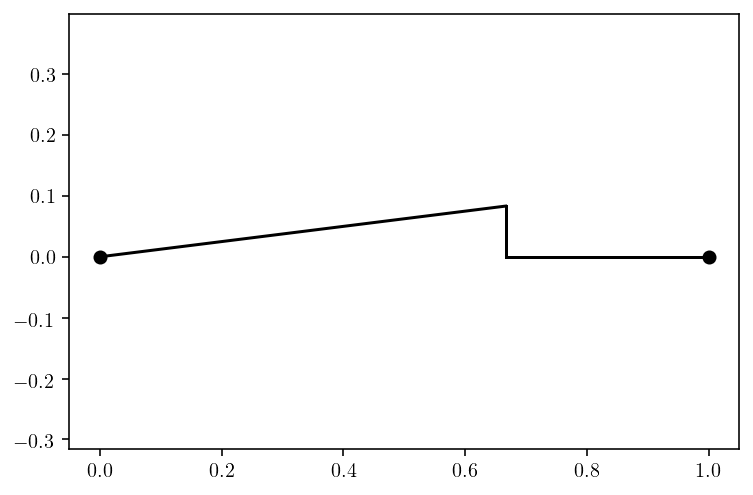

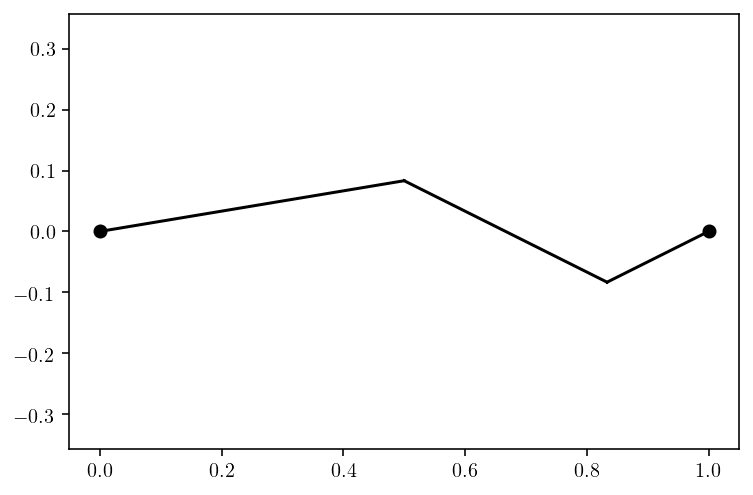

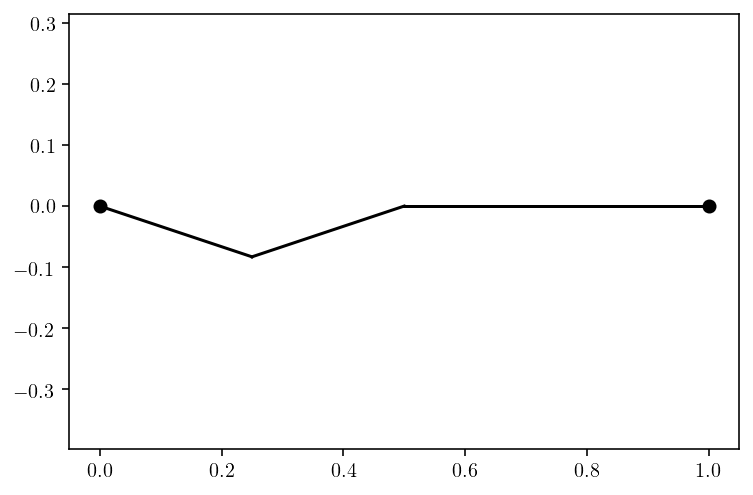

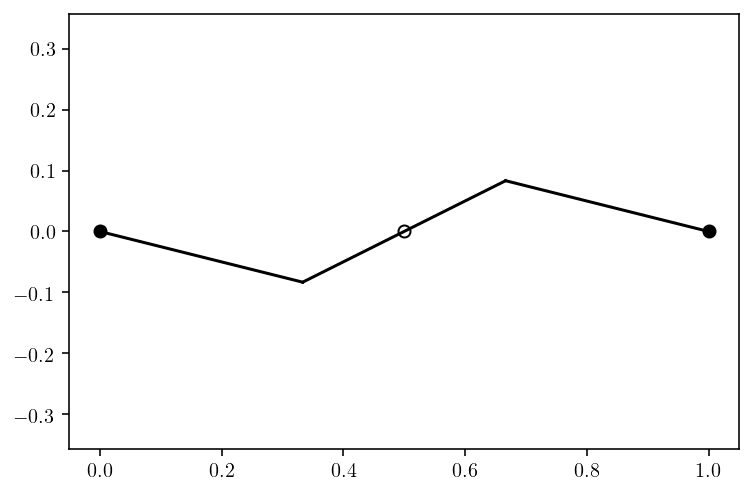

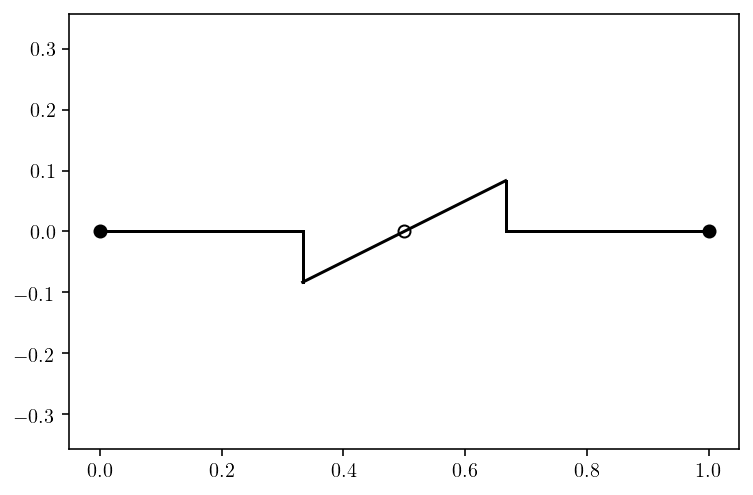

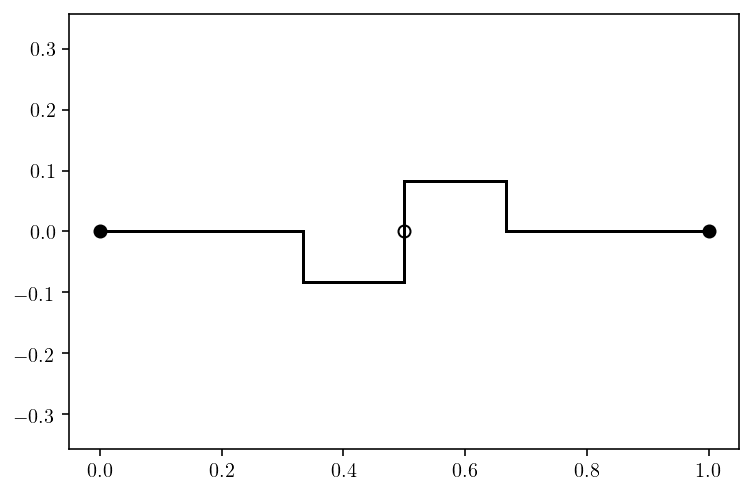

In [7]:
# test plot points

P, V, C = makeEdge('Ea')
plt.figure()
plt.axis('equal')
plotPoints(P)
plotVertices(V)
plotCenters(C)

P, V, C = makeEdge('Eb')
plt.figure()
plt.axis('equal')
plotPoints(P)
plotVertices(V)
plotCenters(C)

P, V, C = makeEdge('Ec')
plt.figure()
plt.axis('equal')
plotPoints(P)
plotVertices(V)
plotCenters(C)

P, V, C = makeEdge('Ca')
plt.figure()
plt.axis('equal')
plotPoints(P)
plotVertices(V)
plotCenters(C)

P, V, C = makeEdge('Cb')
plt.figure()
plt.axis('equal')
plotPoints(P)
plotVertices(V)
plotCenters(C)

P, V, C = makeEdge('Cc')
plt.figure()
plt.axis('equal')
plotPoints(P)
plotVertices(V)
plotCenters(C)

In [8]:
def scale(P, scalefactors):
    '''
    scale points by 2-d scalefactors
    '''
    
    scalex = scalefactors[0]
    scaley = scalefactors[1]

    N = P.shape[0]
    Q = np.empty_like(P)
    
    for ii in range(0,N):
        Q[ii,0] = scalex*P[ii,0]
        Q[ii,1] = scaley*P[ii,1]
        
    return Q

In [9]:
def translate(P, shift):
    '''
    translate points by 2-d shift vector
    '''
    
    N = P.shape[0]
    Q = np.empty_like(P)
    
    for ii in range(0,N):
        Q[ii,:] = P[ii,:] + shift
        
    return Q

In [10]:
def Rz(a):
    '''
    calculate passive rotation matrix around z-axis
    '''
    
    R = np.array([[ np.cos(a), np.sin(a)], 
                  [-np.sin(a), np.cos(a)]])
    
    return R

In [11]:
def rotate(P, A, angle):
    '''
    actively rotate points P->Q around A thru angle (in radians)
    '''
    
    # first translate object back to origin
    P = translate(P, -A)
    
    # then do an active rotation (use minus the angle)
    R = Rz(-angle)
    
    N = P.shape[0]
    Q = np.empty_like(P)
    
    for ii in range(0,N):
        Q[ii,:] = np.dot(R, P[ii,:])
    
    # translate object back to original location
    Q = translate(Q, A)
    
    return Q

[[0.5 0.5]]


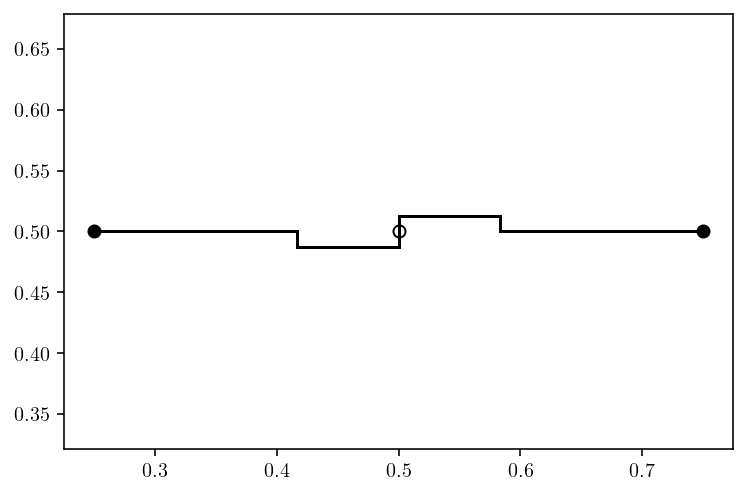

In [12]:
# test scale and translation

P, V, C = makeEdge('Cc')

scalefactors = np.array([0.5, 0.15])
shift = np.array([0.25, .5])
P = scale(P, scalefactors)
P = translate(P, shift)
V = scale(V, scalefactors)
V = translate(V, shift)
C = scale(C, scalefactors)
C = translate(C, shift)

print(C)
plt.figure()
plt.axis('equal')
plotPoints(P)
plotVertices(V)
plotCenters(C)

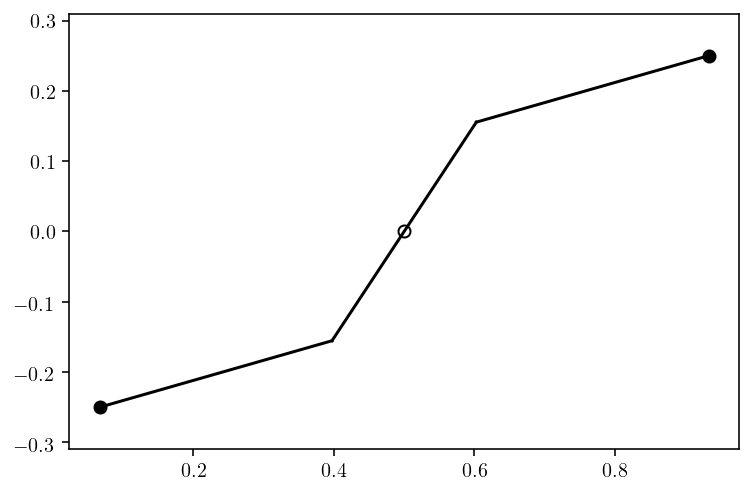

In [13]:
# test rotation

P, V, C = makeEdge('Ca')

A = np.array([0.5, 0])
angle = np.deg2rad(30)
P = rotate(P, A, angle)
V = rotate(V, A, angle)
C = rotate(C, A, angle)

plt.figure()
plt.axis('equal')
plotPoints(P)
plotVertices(V)
plotCenters(C)

In [14]:
def reflect(P, axis):
    '''
    reflect points about an axis defined by [angle (in radians), y-intercept]
    
    NOTE: if angle=pi/2 then axis is vertical and y-intercept is an x-intercept
    '''
    
    # extract reflection axis information
    angle = axis[0]
    b = axis[1]
    
    # check if vertical reflection axis
    if abs(angle)==np.pi/2:
        
        print('vertical reflection axis')
        shift = np.array([b, 0])
        
        # first translate object by -b
        P = translate(P, -shift)
        
        # now reflect about y-axis
        N = P.shape[0]
        Q = np.empty_like(P)
        
        for ii in range(0,N):
            Q[ii,:] = np.array([-P[ii,0], P[ii,1]])    

        # translate object back
        Q = translate(Q, shift)
        
    else:
        
        # first translate object by -b
        shift = np.array([0, b])
        P = translate(P, -shift)
        
        # then rotate by -angle
        A = np.array([0,0])
        P = rotate(P, A, -angle)
        
        # now reflect about x-axis
        N = P.shape[0]
        Q = np.empty_like(P)
        
        for ii in range(0,N):
            Q[ii,:] = np.array([P[ii,0], -P[ii,1]])    
            
        # rotate back to original orientation
        Q = rotate(Q, A, angle)

        # translate back to original location
        Q = translate(Q, shift)
    
    return Q

In [15]:
def glideReflect(P, axis, scalefac):
    '''
    perform glide reflection of points P 
    
    axis = [angle (rad), y-intercept]
    scalefac = amount to translate by in the direction of the axis
    '''
    
    # first reflect
    Q = reflect(P, axis)
    
    # then translate
    angle = axis[0]
    x = scalefac * np.cos(angle)
    y = scalefac * np.sin(angle)
    shift = np.array([x, y])
    
    Q = translate(Q, shift)
    
    return Q

vertical reflection axis
vertical reflection axis
vertical reflection axis
vertical reflection axis


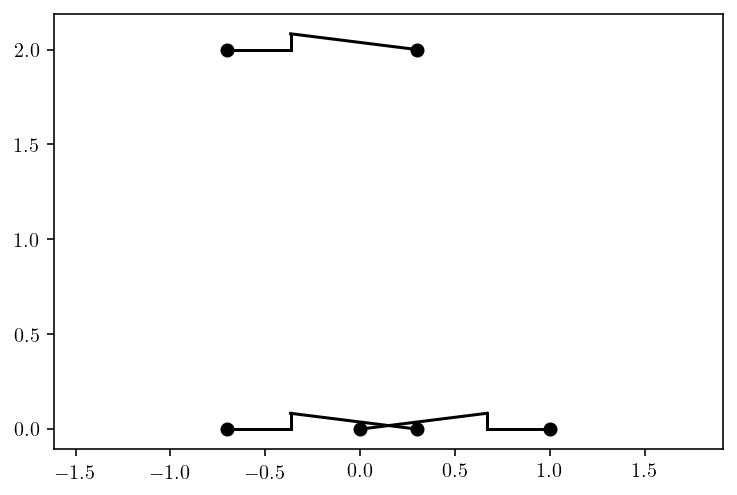

In [16]:
# test reflection and glide reflection

P, V, C = makeEdge('Ea')
plt.figure()
plt.axis('equal')
plotPoints(P)
plotVertices(V)

# reflection
b = 0.15 # y or x-intercept
angle = np.deg2rad(90)
axis = np.array([angle, b])
Q = reflect(P, axis)
W = reflect(V, axis)
plotPoints(Q)
plotVertices(W)

# glide reflection
scalefac = 2
Q = glideReflect(P, axis, scalefac)
W = glideReflect(V, axis, scalefac)
plotPoints(Q)
plotVertices(W)

In [17]:
def colorTile(P, color):
    '''
    color a tile (a closed polygon) defined by points P with color = 'b', 'r', ...
    '''
    
    x = P[:,0]
    y = P[:,1]
    
    plt.fill(x, y, color)
    
    return

In [36]:
def makeTile(type):
    '''
    make asymmetric heesch tile
    
    type = 'CCC', etc.
    '''
    
    if type=='CCC':
        # 666
        
        P1, V1, C1 = makeEdge('Ca')
        P2, V2, C2 = makeEdge('Cb')
        P3, V3, C3 = makeEdge('Cc')
        
        # leave edge 1 as is (just have the points run in the opposite order)
        Q1 = np.flipud(P1)
        W1 = np.flipud(V1)
        D1 = np.flipud(C1)
        
        # rotate edge 2 by 60 degrees
        A = np.array([0,0])
        angle = np.deg2rad(60)
        Q2 = rotate(P2, A, angle)
        W2 = rotate(V2, A, angle)
        D2 = rotate(C2, A, angle)
        
        # rotate edge 3 by -60, then translate to top vertex of equilateral triangle
        S3 = rotate(P3, A, -angle)
        T3 = rotate(V3, A, -angle)
        U3 = rotate(C3, A, -angle)
        x = np.cos(angle)
        y = np.sin(angle)
        shift = np.array([x,y])
        Q3 = translate(S3, shift)
        W3 = translate(T3, shift)
        D3 = translate(U3, shift)
        
        # concatenate points
        P = np.concatenate((Q1, Q2, Q3), axis=0)
        V = np.concatenate((W1, W2, W3), axis=0)
        C = np.concatenate((D1, D2, D3), axis=0)       
        
    if type=='CGG':
        # 666
        
        P1, V1, C1 = makeEdge('Ca')
        P2, V2, C2 = makeEdge('Ea')
        
        # leave edge 1 as is (just have the points run in the opposite order)
        Q1 = np.flipud(P1)
        W1 = np.flipud(V1)
        D1 = np.flipud(C1)
        
        # rotate edge 2 by 60 degrees
        A = np.array([0,0])
        angle = np.deg2rad(60)
        Q2 = rotate(P2, A, angle)
        W2 = rotate(V2, A, angle)
        
        # glide reflect the new edge 2 about a horizontal axis passing thru the midpoint
        b = 0.5*np.sin(angle)
        axis = np.array([0, b])
        scalefac = 0.5
        Q3 = glideReflect(Q2, axis, scalefac)
        W3 = glideReflect(W2, axis, scalefac)
        
        # concatenate points
        P = np.concatenate((Q1, Q2, Q3), axis=0)
        V = np.concatenate((W1, W2, W3), axis=0)
        C = D1
        
    if type=='CC6C6':
        # 666
        
        P1, V1, C1 = makeEdge('Ca')
        P2, V2, C2 = makeEdge('Ea')
        
        # leave edge 1 as is (just have the points run in the opposite order)
        Q1 = np.flipud(P1)
        W1 = np.flipud(V1)
        D1 = np.flipud(C1)
        
        # rotate edge 2 by 60 degrees
        A = np.array([0,0])
        angle = np.deg2rad(60)
        Q2 = rotate(P2, A, angle)
        W2 = rotate(V2, A, angle)
        
        # rotate the new edge 2 by 60 about the vertex (need to change order of points)
        V0 = np.array([np.cos(angle), np.sin(angle)])
        Q3 = rotate(Q2, V0, angle)
        Q3 = np.flipud(Q3)
        W3 = rotate(W2, V0, angle)
        W3 = np.flipud(W3)
        
        # concatenate points
        P = np.concatenate((Q1, Q2, Q3), axis=0)
        V = np.concatenate((W1, W2, W3), axis=0)
        C = D1
        
    if type=='CC4C4':
        # 884: so 8 meet at two vertices
        
        P1, V1, C1 = makeEdge('Ca')
        P2, V2, C2 = makeEdge('Ea')
        
        # leave edge 1 as is (just have the points run in the opposite order)
        Q1 = np.flipud(P1)
        W1 = np.flipud(V1)
        D1 = np.flipud(C1)
        
        # rotate edge 2 by 45 degrees and then rescale by 1/sqrt(2)
        A = np.array([0,0])
        angle = np.deg2rad(45)
        Q2 = rotate(P2, A, angle)
        W2 = rotate(V2, A, angle)
        scalefactors = (1./np.sqrt(2.)) * np.array([1,1])
        Q2 = scale(Q2, scalefactors)
        W2 = scale(W2, scalefactors)
        
        # rotate the new edge 2 by 90 degrees about the vertex (need to change order of points)
        V0 = (1./np.sqrt(2.)) * np.array([np.cos(np.deg2rad(45)), np.sin(np.deg2rad(45))])
        Q3 = rotate(Q2, V0, np.deg2rad(90))
        Q3 = np.flipud(Q3)
        W3 = rotate(W2, V0, np.deg2rad(90))
        W3 = np.flipud(W3)
        
        # concatenate points
        P = np.concatenate((Q1, Q2, Q3), axis=0)
        V = np.concatenate((W1, W2, W3), axis=0)
        C = D1
        
    if type=='CC3C3':
        # 12, 12, 3: purposely not used by escher since 12 meet at 2 vertices
        
        P1, V1, C1 = makeEdge('Ca')
        P2, V2, C2 = makeEdge('Ea')
        
        # leave edge 1 as is (just have the points run in the opposite order)
        Q1 = np.flipud(P1)
        W1 = np.flipud(V1)
        D1 = np.flipud(C1)
        
        # rotate edge 2 by 30 degrees and then rescale by 1/sqrt(3)
        A = np.array([0,0])
        angle = np.deg2rad(30)
        Q2 = rotate(P2, A, angle)
        W2 = rotate(V2, A, angle)
        scalefactors = (1./np.sqrt(3.)) * np.array([1,1])
        Q2 = scale(Q2, scalefactors)
        W2 = scale(W2, scalefactors)
        
        # rotate the new edge 2 by 120 degrees about the vertex (need to change order of points)
        V0 = (1./np.sqrt(3.)) * np.array([np.cos(np.deg2rad(30)), np.sin(np.deg2rad(30))])
        Q3 = rotate(Q2, V0, np.deg2rad(120))
        Q3 = np.flipud(Q3)
        W3 = rotate(W2, V0, np.deg2rad(120))
        W3 = np.flipud(W3)
        
        # concatenate points
        P = np.concatenate((Q1, Q2, Q3), axis=0)
        V = np.concatenate((W1, W2, W3), axis=0)
        C = D1
    
    return P, V, C

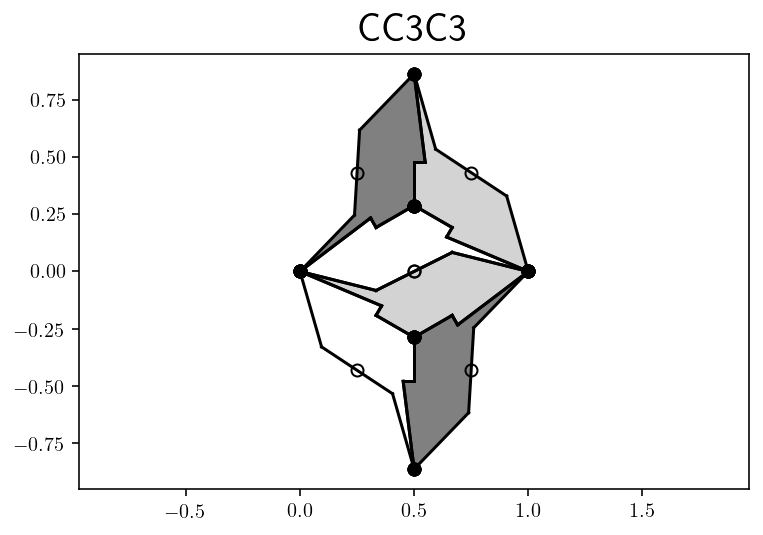

In [35]:
# test make tile
heeschType = 'CC3C3' 

P, V, C = makeTile(heeschType)
plt.figure()
plt.title(heeschType, fontsize='20')
plotPoints(P)
plotVertices(V)
plotCenters(C)
colorTile(P, 'w')
plt.axis('equal')

# rotate tile 0 about center of bottom edge
A = 0.5*np.array([1,0])
angle = np.deg2rad(180)
P1 = rotate(P, A, angle)
V1 = rotate(V, A, angle)
C1 = rotate(C, A, angle)
plotPoints(P1)
plotVertices(V1)
plotCenters(C1)
colorTile(P1, 'lightgrey')

# rotate tile 0 about vertex by 120 degrees
V0 = (1./np.sqrt(3.)) * np.array([np.cos(np.deg2rad(30)), np.sin(np.deg2rad(30))])
angle = np.deg2rad(120)
P2 = rotate(P, V0, angle)
V2 = rotate(V, V0, angle)
C2 = rotate(C, V0, angle)
plotPoints(P2)
plotVertices(V2)
plotCenters(C2)
colorTile(P2, 'lightgrey')

# rotate tile 0 about vertex by -120 degrees
angle = np.deg2rad(-120)
P3 = rotate(P, V0, angle)
V3 = rotate(V, V0, angle)
C3 = rotate(C, V0, angle)
plotPoints(P3)
plotVertices(V3)
plotCenters(C3)
colorTile(P3, 'grey')

# rotate tile 1 about inverted vertex by 120
V0 = (1./np.sqrt(3.)) * np.array([np.cos(np.deg2rad(-30)), np.sin(np.deg2rad(-30))])
angle = np.deg2rad(120)
P4 = rotate(P1, V0, angle)
V4 = rotate(V1, V0, angle)
C4 = rotate(C1, V0, angle)
plotPoints(P4)
plotVertices(V4)
plotCenters(C4)
colorTile(P4, 'w')

# rotate tile 1 about inverted vertex by -120
V0 = (1./np.sqrt(3.)) * np.array([np.cos(np.deg2rad(-30)), np.sin(np.deg2rad(-30))])
angle = np.deg2rad(-120)
P5 = rotate(P1, V0, angle)
V5 = rotate(V1, V0, angle)
C5 = rotate(C1, V0, angle)
plotPoints(P5)
plotVertices(V5)
plotCenters(C5)
colorTile(P5, 'grey')

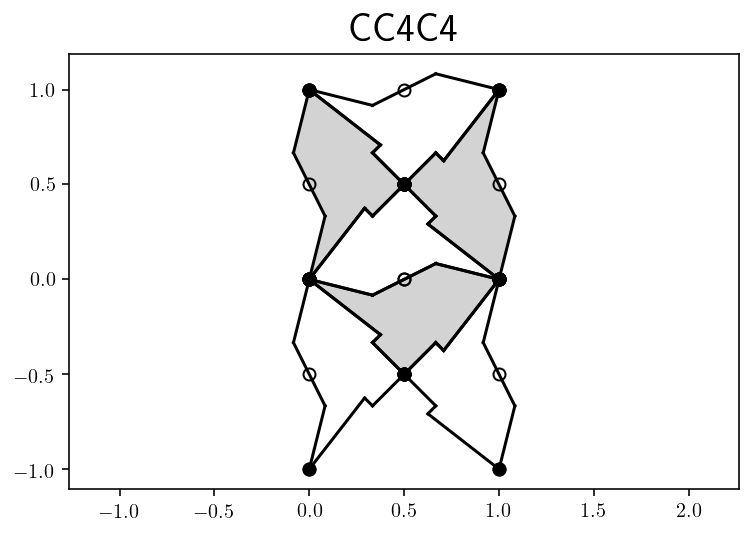

In [19]:
# test make tile
heeschType = 'CC4C4' 

P, V, C = makeTile(heeschType)
plt.figure()
plt.title(heeschType, fontsize='20')
plotPoints(P)
plotVertices(V)
plotCenters(C)
colorTile(P, 'w')
plt.axis('equal')

# rotate tile 1 about center of bottom edge
A = 0.5*np.array([1,0])
angle = np.deg2rad(180)
P1 = rotate(P, A, angle)
V1 = rotate(V, A, angle)
C1 = rotate(C, A, angle)
plotPoints(P1)
plotVertices(V1)
plotCenters(C1)
colorTile(P1, 'lightgrey')

# rotate tile 0 about vertex by 90 degrees
V0 = (1./np.sqrt(2.)) * np.array([np.cos(np.deg2rad(45)), np.sin(np.deg2rad(45))])
angle = np.deg2rad(90)
P2 = rotate(P, V0, angle)
V2 = rotate(V, V0, angle)
C2 = rotate(C, V0, angle)
plotPoints(P2)
plotVertices(V2)
plotCenters(C2)
colorTile(P2, 'lightgrey')

# rotate tile 0 about vertex by -90 degrees
angle = np.deg2rad(-90)
P3 = rotate(P, V0, angle)
V3 = rotate(V, V0, angle)
C3 = rotate(C, V0, angle)
plotPoints(P3)
plotVertices(V3)
plotCenters(C3)
colorTile(P3, 'lightgrey')

# rotate tile 0 about vertex by 180 degrees
angle = np.deg2rad(180)
P4 = rotate(P, V0, angle)
V4 = rotate(V, V0, angle)
C4 = rotate(C, V0, angle)
plotPoints(P4)
plotVertices(V4)
plotCenters(C4)
colorTile(P4, 'w')

# rotate tile 0 about origin by -90
A = np.array([0,0])
angle = np.deg2rad(-90)
P5 = rotate(P, A, angle)
V5 = rotate(V, A, angle)
C5 = rotate(C, A, angle)
plotPoints(P5)
plotVertices(V5)
plotCenters(C5)
colorTile(P5, 'w')

# rotate tile 0 about bottom-right vertex by 90
A = np.array([1,0])
angle = np.deg2rad(90)
P6 = rotate(P, A, angle)
V6 = rotate(V, A, angle)
C6 = rotate(C, A, angle)
plotPoints(P6)
plotVertices(V6)
plotCenters(C6)
colorTile(P6, 'w')

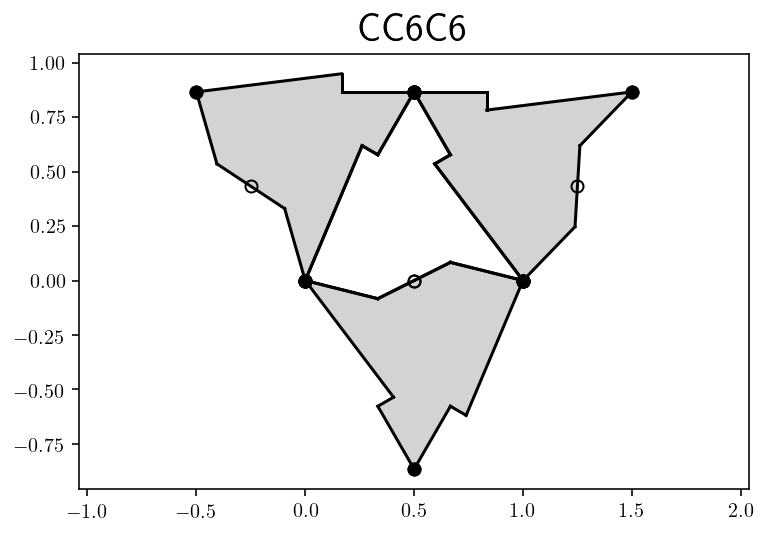

In [20]:
# test make tile
heeschType = 'CC6C6' 

P, V, C = makeTile(heeschType)
plt.figure()
plt.title(heeschType, fontsize='20')
plotPoints(P)
plotVertices(V)
plotCenters(C)
colorTile(P, 'w')
plt.axis('equal')

# rotate tile about center of bottom edge
A = 0.5*np.array([1,0])
angle = np.deg2rad(180)
P1 = rotate(P, A, angle)
V1 = rotate(V, A, angle)
C1 = rotate(C, A, angle)
plotPoints(P1)
plotVertices(V1)
plotCenters(C1)
colorTile(P1, 'lightgrey')

# rotate tile about vertex by 60 degrees
V0 = np.array([np.cos(np.deg2rad(60)), np.sin(np.deg2rad(60))])
angle = np.deg2rad(60)
P2 = rotate(P, V0, angle)
V2 = rotate(V, V0, angle)
C2 = rotate(C, V0, angle)
plotPoints(P2)
plotVertices(V2)
plotCenters(C2)
colorTile(P2, 'lightgrey')

# rotate tile about vertex by -60 degrees
angle = np.deg2rad(-60)
P3 = rotate(P, V0, angle)
V3 = rotate(V, V0, angle)
C3 = rotate(C, V0, angle)
plotPoints(P3)
plotVertices(V3)
plotCenters(C3)
colorTile(P3, 'lightgrey')

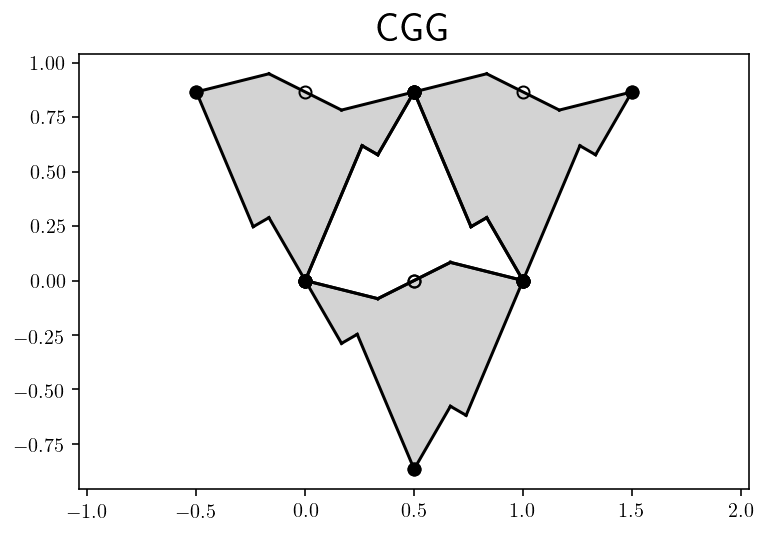

In [21]:
# test make tile
heeschType = 'CGG' 

P, V, C = makeTile(heeschType)
plt.figure()
plt.title(heeschType, fontsize='20')
plotPoints(P)
plotVertices(V)
plotCenters(C)
colorTile(P, 'w')
plt.axis('equal')

# rotate tile about center of bottom edge
A = 0.5*np.array([1,0])
angle = np.deg2rad(180)
P1 = rotate(P, A, angle)
V1 = rotate(V, A, angle)
C1 = rotate(C, A, angle)
plotPoints(P1)
plotVertices(V1)
plotCenters(C1)
colorTile(P1, 'lightgrey')

# glide reflect about horizontal axis passing through middle point
angle = np.deg2rad(60)
b = 0.5*np.sin(angle)
axis = np.array([0, b])
scalefac = 0.5
P2 = glideReflect(P, axis, scalefac)
V2 = glideReflect(V, axis, scalefac)
C2 = glideReflect(C, axis, scalefac)
plotPoints(P2)
plotVertices(V2)
plotCenters(C2)
colorTile(P2, 'lightgrey')

# repeat but in opposite direction
angle = np.deg2rad(60)
b = 0.5*np.sin(angle)
axis = np.array([0, b])
scalefac = -0.5
P3 = glideReflect(P, axis, scalefac)
V3 = glideReflect(V, axis, scalefac)
C3 = glideReflect(C, axis, scalefac)
plotPoints(P3)
plotVertices(V3)
plotCenters(C3)
colorTile(P3, 'lightgrey')

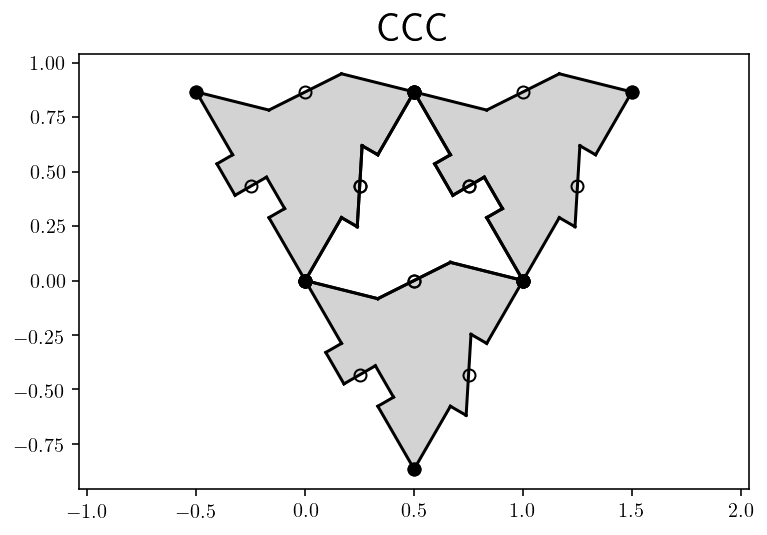

In [22]:
# test make tile
heeschType = 'CCC' 

P, V, C = makeTile(heeschType)
plt.figure()
plt.title(heeschType, fontsize='20')
plotPoints(P)
plotVertices(V)
plotCenters(C)
colorTile(P, 'w')
plt.axis('equal')

# rotate tile about centers of edges
A = 0.5*np.array([1,0])
angle = np.deg2rad(180)
P1 = rotate(P, A, angle)
V1 = rotate(V, A, angle)
C1 = rotate(C, A, angle)
plotPoints(P1)
plotVertices(V1)
plotCenters(C1)
colorTile(P1, 'lightgrey')

A = 0.5*np.array([np.cos(np.deg2rad(60)), np.sin(np.deg2rad(60))])
angle = np.deg2rad(180)
P2 = rotate(P, A, angle)
V2 = rotate(V, A, angle)
C2 = rotate(C, A, angle)
plotPoints(P2)
plotVertices(V2)
plotCenters(C2)
colorTile(P2, 'lightgrey')

A = A + 0.5*np.array([1,0])
angle = np.deg2rad(180)
P3 = rotate(P, A, angle)
V3 = rotate(V, A, angle)
C3 = rotate(C, A, angle)
plotPoints(P3)
plotVertices(V3)
plotCenters(C3)
colorTile(P3, 'lightgrey')